In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("Operations_analyst_data.csv")

# Standardize column names
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# Convert date column
df["day"] = pd.to_datetime(df["day"], errors="coerce")

df.head()

,day,entity,product,price_tier,anticipation_method,payment_method,installments,amount_transacted,quantity_transactions,quantity_of_merchants
0,2025-01-01,PJ,pix,intermediary,Pix,uninformed,1,546030.68,13361,675
1,2025-01-01,PJ,pos,intermediary,D1Anticipation,credit,1,574568.13,9104,694
2,2025-01-01,PJ,tap,normal,D0/Nitro,credit,1,342178.87,2655,1607
3,2025-01-01,PJ,tap,domination,D1Anticipation,debit,1,1183.21,63,9
4,2025-01-01,PJ,tap,aggressive,D0/Nitro,credit,1,10158.11,30,20


In [4]:
print("Rows, Columns:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:")
print(df.isna().sum())

# Date range
print("\nDate range:", df["day"].min(), "to", df["day"].max())

# Unique values in categorical columns
for col in ["entity", "product", "payment_method", "price_tier", "anticipation_method", "nitro_or_d0"]:
    if col in df.columns:
        print(f"\n{col} → {df[col].unique()}")

Rows, Columns: (37787, 10)

Columns: ['day', 'entity', 'product', 'price_tier', 'anticipation_method', 'payment_method', 'installments', 'amount_transacted', 'quantity_transactions', 'quantity_of_merchants']

Missing values:
day                      0
entity                   0
product                  0
price_tier               0
anticipation_method      0
payment_method           0
installments             0
amount_transacted        0
quantity_transactions    0
quantity_of_merchants    0
dtype: int64

Date range: 2025-01-01 00:00:00 to 2025-03-31 00:00:00

entity → ['PJ' 'PF']

product → ['pix' 'pos' 'tap' 'link' 'bank_slip']

payment_method → ['uninformed' 'credit' 'debit']

price_tier → ['intermediary' 'normal' 'domination' 'aggressive']

anticipation_method → ['Pix' 'D1Anticipation' 'D0/Nitro' 'Bank Slip']


In [5]:
# Avg Ticket = amount_transacted / number of transactions
df["avg_ticket"] = df["amount_transacted"] / df["quantity_transactions"].replace(0, pd.NA)

# Add weekday column
df["weekday"] = df["day"].dt.day_name()

df.head()

,day,entity,product,price_tier,anticipation_method,payment_method,installments,amount_transacted,quantity_transactions,quantity_of_merchants,avg_ticket,weekday
0,2025-01-01,PJ,pix,intermediary,Pix,uninformed,1,546030.68,13361,675,40.867501,Wednesday
1,2025-01-01,PJ,pos,intermediary,D1Anticipation,credit,1,574568.13,9104,694,63.111614,Wednesday
2,2025-01-01,PJ,tap,normal,D0/Nitro,credit,1,342178.87,2655,1607,128.880930,Wednesday
3,2025-01-01,PJ,tap,domination,D1Anticipation,debit,1,1183.21,63,9,18.781111,Wednesday
4,2025-01-01,PJ,tap,aggressive,D0/Nitro,credit,1,10158.11,30,20,338.603667,Wednesday


In [6]:
tpv_by_product = df.groupby("product")["amount_transacted"].sum().reset_index().sort_values("amount_transacted", ascending=False)
tpv_by_entity = df.groupby("entity")["amount_transacted"].sum().reset_index()
tpv_by_payment = df.groupby("payment_method")["amount_transacted"].sum().reset_index()

display(tpv_by_product, tpv_by_entity, tpv_by_payment)

,product,amount_transacted
3,pos,8.239753e+09
4,tap,6.251408e+09
2,pix,2.475734e+09
1,link,2.433701e+09
0,bank_slip,4.203946e+07


,entity,amount_transacted
0,PF,5.971816e+09
1,PJ,1.347082e+10


,payment_method,amount_transacted
0,credit,1.443292e+10
1,debit,2.491939e+09
2,uninformed,2.517773e+09


In [7]:
avg_by_product = df.groupby("product")["avg_ticket"].mean().reset_index().sort_values("avg_ticket", ascending=False)
avg_by_entity = df.groupby("entity")["avg_ticket"].mean().reset_index()
avg_by_payment = df.groupby("payment_method")["avg_ticket"].mean().reset_index()

display(avg_by_product, avg_by_entity, avg_by_payment)

,product,avg_ticket
4,tap,1965.639904
1,link,1398.539487
3,pos,1343.878851
0,bank_slip,1027.060804
2,pix,103.189470


,entity,avg_ticket
0,PF,1120.449629
1,PJ,1793.361014


,payment_method,avg_ticket
0,credit,1697.799276
1,debit,89.290846
2,uninformed,450.961617


In [8]:
import os
import matplotlib.pyplot as plt

out_dir = "outputs"
os.makedirs(out_dir, exist_ok=True)

def bar_chart(df_in, x, y, title, xlabel=None, ylabel=None, rotate=45, fname=None, top=None):
    d = df_in.copy()
    if top is not None:
        d = d.head(top)
    plt.figure()
    plt.bar(d[x].astype(str), d[y].astype(float))
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    if fname:
        path = f"{out_dir}/{fname}"
        plt.savefig(path, dpi=150, bbox_inches="tight")
        print("Saved:", path)
    plt.show()

def line_chart(df_in, x, y, title, xlabel=None, ylabel=None, rotate=45, fname=None):
    d = df_in.copy()
    plt.figure()
    plt.plot(d[x], d[y])
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    if rotate: plt.xticks(rotation=rotate, ha="right")
    plt.tight_layout()
    if fname:
        path = f"{out_dir}/{fname}"
        plt.savefig(path, dpi=150, bbox_inches="tight")
        print("Saved:", path)
    plt.show()

Saved: outputs/tpv_by_product.png


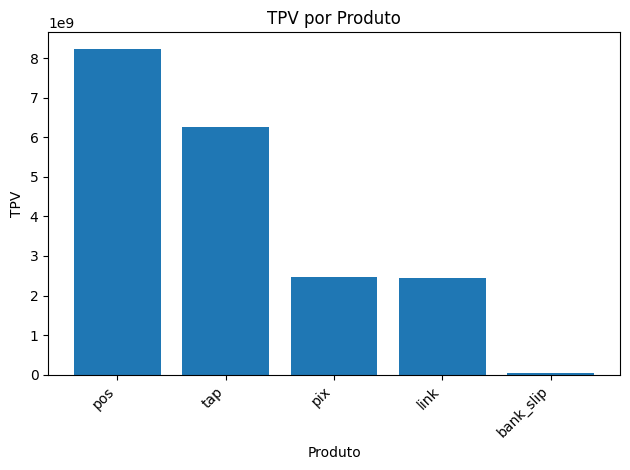

Saved: outputs/tpv_by_entity.png


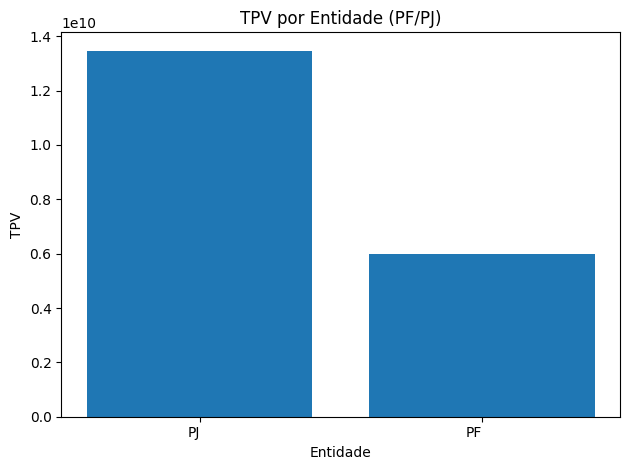

Saved: outputs/tpv_by_payment.png


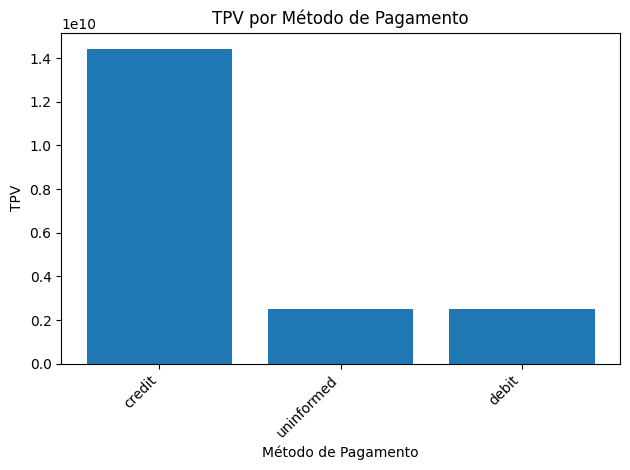

In [9]:
# Ordena por TPV (amount_transacted)
tpv_by_product_plot = tpv_by_product.sort_values("amount_transacted", ascending=False)
bar_chart(tpv_by_product_plot, "product", "amount_transacted",
          title="TPV por Produto",
          xlabel="Produto", ylabel="TPV",
          fname="tpv_by_product.png")

tpv_by_entity_plot = tpv_by_entity.sort_values("amount_transacted", ascending=False)
bar_chart(tpv_by_entity_plot, "entity", "amount_transacted",
          title="TPV por Entidade (PF/PJ)",
          xlabel="Entidade", ylabel="TPV",
          rotate=0, fname="tpv_by_entity.png")

tpv_by_payment_plot = tpv_by_payment.sort_values("amount_transacted", ascending=False)
bar_chart(tpv_by_payment_plot, "payment_method", "amount_transacted",
          title="TPV por Método de Pagamento",
          xlabel="Método de Pagamento", ylabel="TPV",
          fname="tpv_by_payment.png")

Saved: outputs/avg_ticket_by_product.png


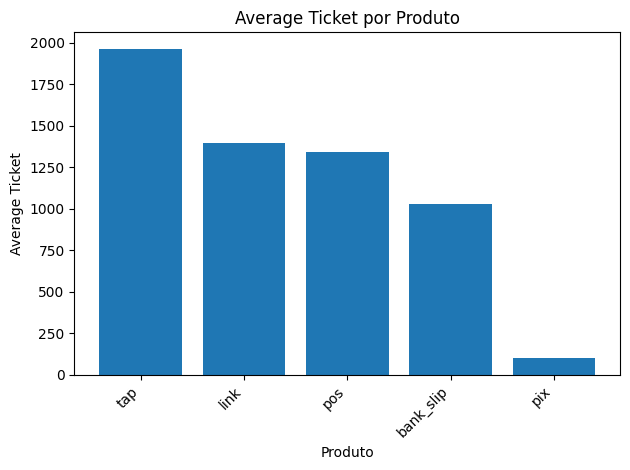

Saved: outputs/avg_ticket_by_entity.png


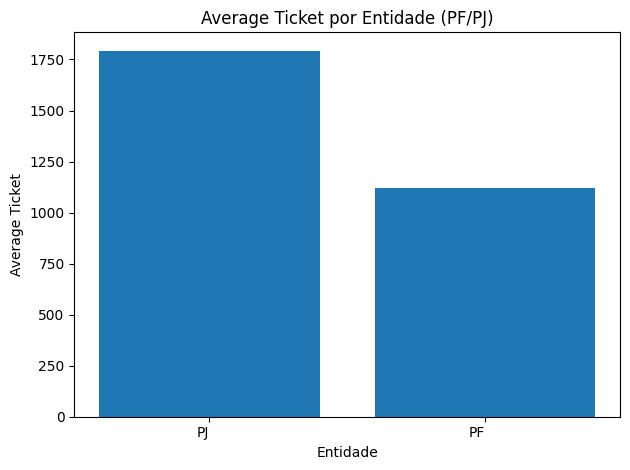

Saved: outputs/avg_ticket_by_payment.png


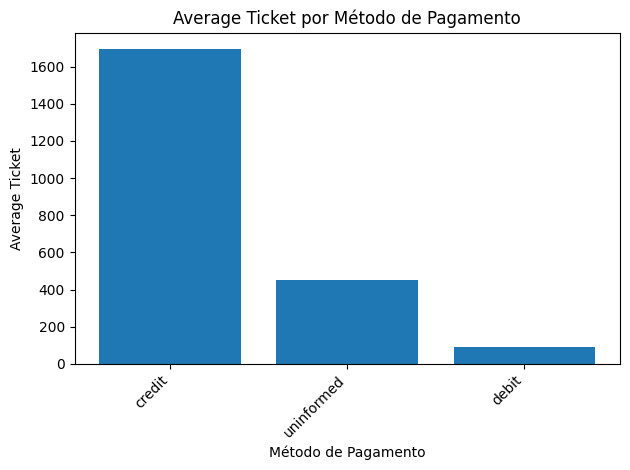

In [10]:
avg_by_product_plot = avg_by_product.sort_values("avg_ticket", ascending=False)
bar_chart(avg_by_product_plot, "product", "avg_ticket",
          title="Average Ticket por Produto",
          xlabel="Produto", ylabel="Average Ticket",
          fname="avg_ticket_by_product.png")

avg_by_entity_plot = avg_by_entity.sort_values("avg_ticket", ascending=False)
bar_chart(avg_by_entity_plot, "entity", "avg_ticket",
          title="Average Ticket por Entidade (PF/PJ)",
          xlabel="Entidade", ylabel="Average Ticket",
          rotate=0, fname="avg_ticket_by_entity.png")

avg_by_payment_plot = avg_by_payment.sort_values("avg_ticket", ascending=False)
bar_chart(avg_by_payment_plot, "payment_method", "avg_ticket",
          title="Average Ticket por Método de Pagamento",
          xlabel="Método de Pagamento", ylabel="Average Ticket",
          fname="avg_ticket_by_payment.png")

Saved: outputs/installments_vs_tpv.png


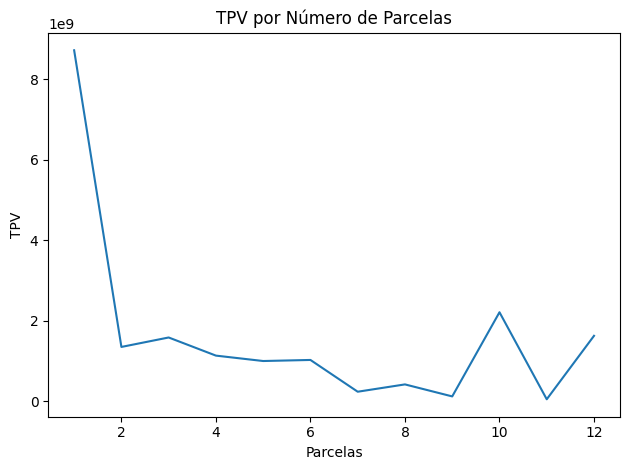

Saved: outputs/installments_vs_transactions.png


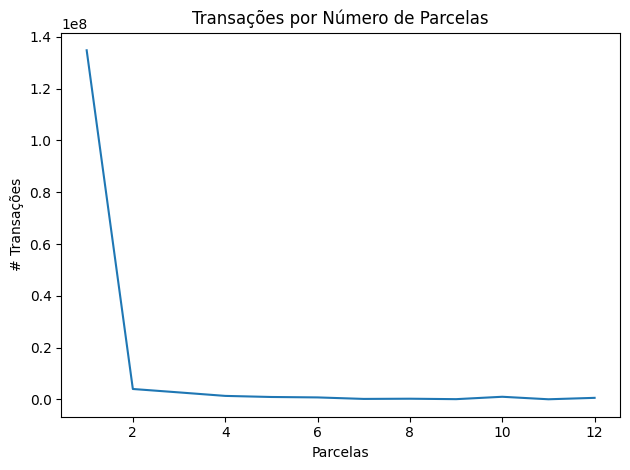

In [11]:
inst_tpv = df.groupby("installments")["amount_transacted"].sum().reset_index().rename(columns={"amount_transacted": "tpv"})
inst_tx  = df.groupby("installments")["quantity_transactions"].sum().reset_index().rename(columns={"quantity_transactions": "transactions"})

inst_tpv = inst_tpv.sort_values("installments")
inst_tx  = inst_tx.sort_values("installments")

line_chart(inst_tpv, "installments", "tpv",
           title="TPV por Número de Parcelas",
           xlabel="Parcelas", ylabel="TPV",
           rotate=0, fname="installments_vs_tpv.png")

line_chart(inst_tx, "installments", "transactions",
           title="Transações por Número de Parcelas",
           xlabel="Parcelas", ylabel="# Transações",
           rotate=0, fname="installments_vs_transactions.png")

Saved: outputs/price_tier_tpv.png


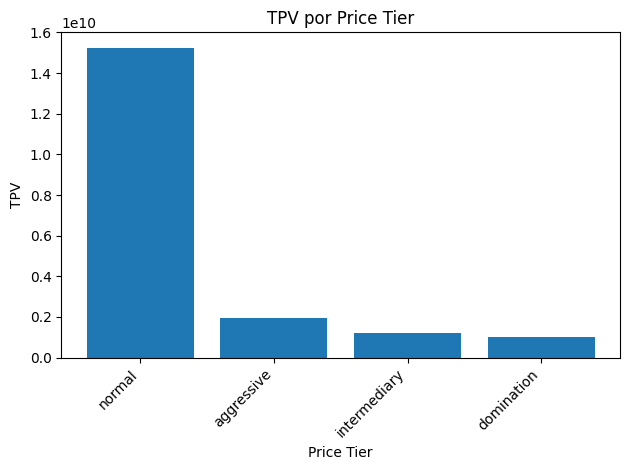

Saved: outputs/price_tier_transactions.png


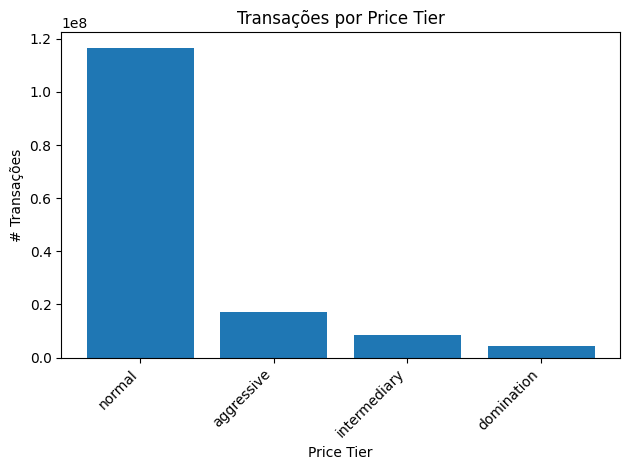

Saved: outputs/price_tier_avg_ticket.png


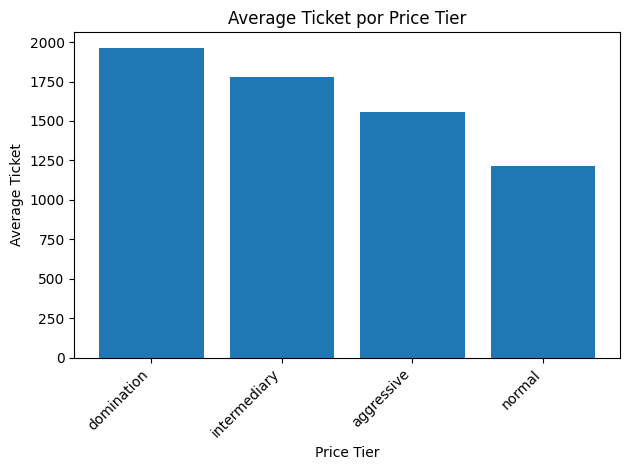

In [12]:
tier = df.groupby("price_tier").agg(
    tpv=("amount_transacted", "sum"),
    transactions=("quantity_transactions", "sum"),
    avg_ticket=("avg_ticket", "mean")
).reset_index()

tier_tpv = tier.sort_values("tpv", ascending=False)
bar_chart(tier_tpv, "price_tier", "tpv",
          title="TPV por Price Tier",
          xlabel="Price Tier", ylabel="TPV",
          fname="price_tier_tpv.png")

tier_tx = tier.sort_values("transactions", ascending=False)
bar_chart(tier_tx, "price_tier", "transactions",
          title="Transações por Price Tier",
          xlabel="Price Tier", ylabel="# Transações",
          fname="price_tier_transactions.png")

tier_avg = tier.sort_values("avg_ticket", ascending=False)
bar_chart(tier_avg, "price_tier", "avg_ticket",
          title="Average Ticket por Price Tier",
          xlabel="Price Tier", ylabel="Average Ticket",
          fname="price_tier_avg_ticket.png")

Saved: outputs/weekday_tpv.png


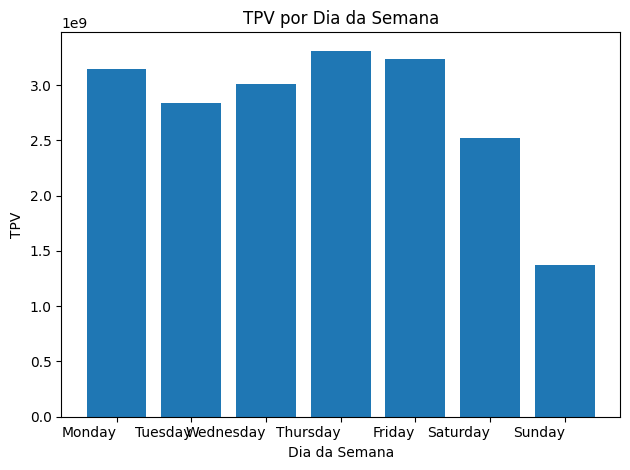

Saved: outputs/weekday_avg_ticket.png


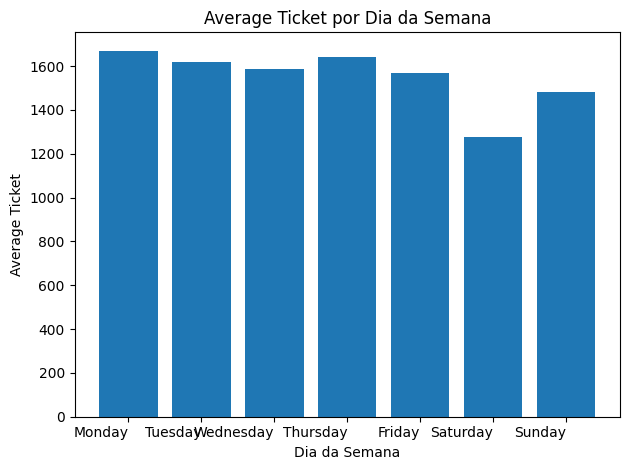

In [13]:
df["weekday"] = df["day"].dt.day_name()
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
wk = df.groupby("weekday").agg(
    tpv=("amount_transacted","sum"),
    avg_ticket=("avg_ticket","mean")
).reindex(weekday_order).reset_index()

bar_chart(wk, "weekday", "tpv",
          title="TPV por Dia da Semana",
          xlabel="Dia da Semana", ylabel="TPV",
          rotate=0, fname="weekday_tpv.png")

bar_chart(wk, "weekday", "avg_ticket",
          title="Average Ticket por Dia da Semana",
          xlabel="Dia da Semana", ylabel="Average Ticket",
          rotate=0, fname="weekday_avg_ticket.png")

Saved: outputs/daily_tpv.png


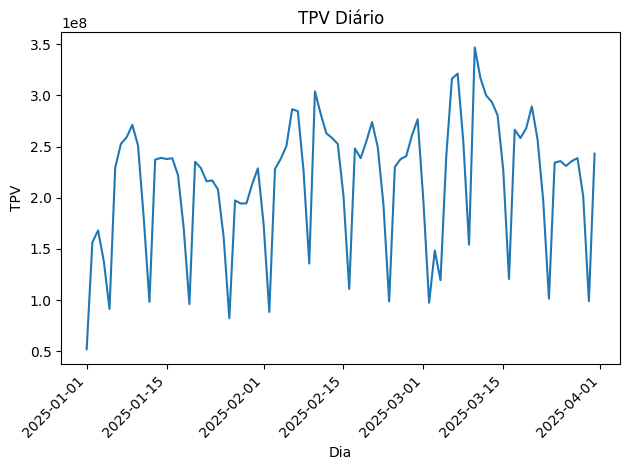

Saved: outputs/daily_tpv_with_rolling.png


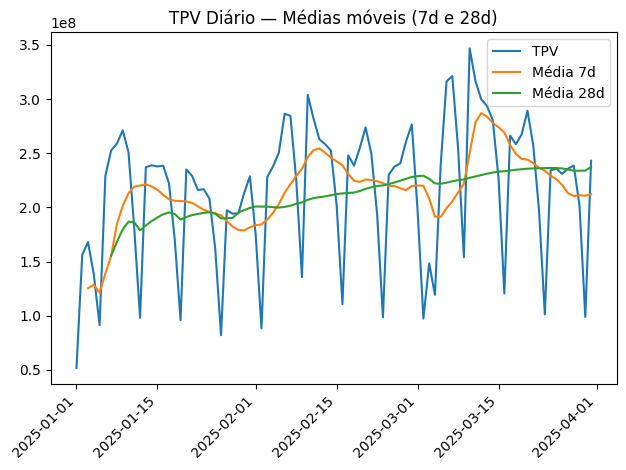

,day,tpv,transactions,tpv_7d_mean,tpv_28d_mean,tpv_28d_std,tpv_z_28d
80,2025-03-22,1.970073e+08,2077316,2.366232e+08,2.361931e+08,7.014815e+07,-0.558615
81,2025-03-23,1.012779e+08,1290093,2.338689e+08,2.362885e+08,6.995558e+07,-1.929947
82,2025-03-24,2.342905e+08,1486512,2.292891e+08,2.364367e+08,6.994647e+07,-0.030684
83,2025-03-25,2.357850e+08,1626625,2.260656e+08,2.363691e+08,6.994614e+07,-0.008351
84,2025-03-26,2.310399e+08,1645439,2.208456e+08,2.360242e+08,6.994782e+07,-0.071257
85,2025-03-27,2.357762e+08,1742064,2.132018e+08,2.351237e+08,6.977661e+07,0.009351
86,2025-03-28,2.387213e+08,1978946,2.105569e+08,2.337694e+08,6.930733e+07,0.071450
87,2025-03-29,2.015402e+08,2163694,2.112044e+08,2.339356e+08,6.922112e+07,-0.467999
88,2025-03-30,9.896321e+07,1345005,2.108737e+08,2.339915e+08,6.910719e+07,-1.953897
89,2025-03-31,2.431165e+08,1560426,2.121346e+08,2.373740e+08,6.705029e+07,0.085645


In [14]:
daily = df.groupby("day").agg(
    tpv=("amount_transacted","sum"),
    transactions=("quantity_transactions","sum")
).sort_index().reset_index()

# Baselines (precisam de dados suficientes para serem informativos)
daily["tpv_7d_mean"]  = daily["tpv"].rolling(7, min_periods=3).mean()
daily["tpv_28d_mean"] = daily["tpv"].rolling(28, min_periods=7).mean()
daily["tpv_28d_std"]  = daily["tpv"].rolling(28, min_periods=7).std()
daily["tpv_z_28d"]    = (daily["tpv"] - daily["tpv_28d_mean"]) / daily["tpv_28d_std"]

# Curva principal de TPV
line_chart(daily, "day", "tpv",
           title="TPV Diário",
           xlabel="Dia", ylabel="TPV",
           rotate=45, fname="daily_tpv.png")

# Opcional: linhas das médias móveis (plotar juntas rapidamente)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(daily["day"], daily["tpv"], label="TPV")
plt.plot(daily["day"], daily["tpv_7d_mean"], label="Média 7d")
plt.plot(daily["day"], daily["tpv_28d_mean"], label="Média 28d")
plt.title("TPV Diário — Médias móveis (7d e 28d)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.tight_layout()
path = f"{out_dir}/daily_tpv_with_rolling.png"
plt.savefig(path, dpi=150, bbox_inches="tight")
print("Saved:", path)
plt.show()

daily.tail(10)

Saved: outputs/anticipation_tpv.png


<Figure size 640x480 with 0 Axes>

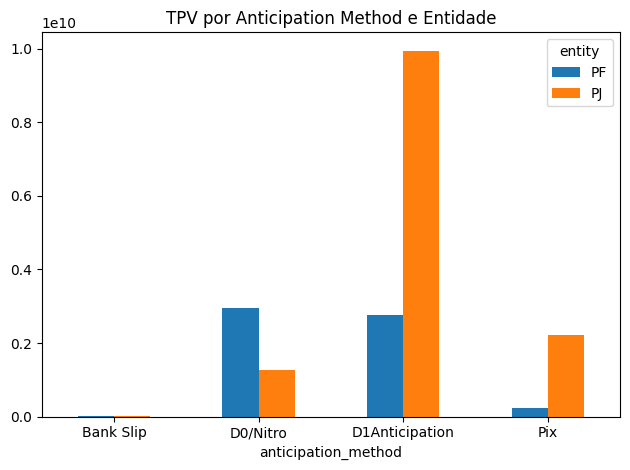

Saved: outputs/anticipation_tx.png


<Figure size 640x480 with 0 Axes>

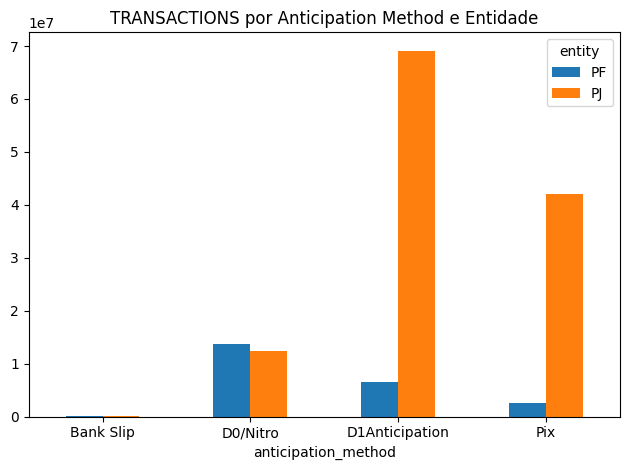

In [15]:
if {"entity","anticipation_method"}.issubset(df.columns):
    ant = df.groupby(["entity","anticipation_method"]).agg(
        tpv=("amount_transacted","sum"),
        transactions=("quantity_transactions","sum")
    ).reset_index()

    # Um gráfico por métrica
    for metric, fname in [("tpv","anticipation_tpv.png"), ("transactions","anticipation_tx.png")]:
        pivot = ant.pivot(index="anticipation_method", columns="entity", values=metric).fillna(0)
        plt.figure()
        pivot.plot(kind="bar")
        plt.title(f"{metric.upper()} por Anticipation Method e Entidade")
        plt.xticks(rotation=0)
        plt.tight_layout()
        path = f"{out_dir}/{fname}"
        plt.savefig(path, dpi=150, bbox_inches="tight")
        print("Saved:", path)
        plt.show()

if {"entity","nitro_or_d0"}.issubset(df.columns):
    nd = df.groupby(["entity","nitro_or_d0"]).agg(
        tpv=("amount_transacted","sum"),
        transactions=("quantity_transactions","sum")
    ).reset_index()

    for metric, fname in [("tpv","nitro_d0_tpv.png"), ("transactions","nitro_d0_tx.png")]:
        pivot = nd.pivot(index="nitro_or_d0", columns="entity", values=metric).fillna(0)
        plt.figure()
        pivot.plot(kind="bar")
        plt.title(f"{metric.upper()} — Nitro vs D0 por Entidade")
        plt.xticks(rotation=0)
        plt.tight_layout()
        path = f"{out_dir}/{fname}"
        plt.savefig(path, dpi=150, bbox_inches="tight")
        print("Saved:", path)
        plt.show()